In [1]:
from numpy.random import exponential
import matplotlib.pyplot as plt
%matplotlib inline

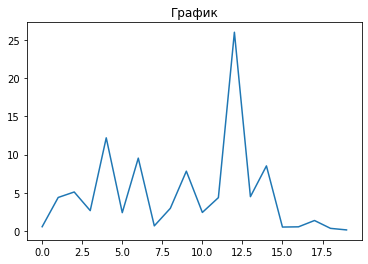

In [2]:
fig, axes = plt.subplots()
axes.plot(exponential(5, 20))
axes.set_title('График')
plt.show()

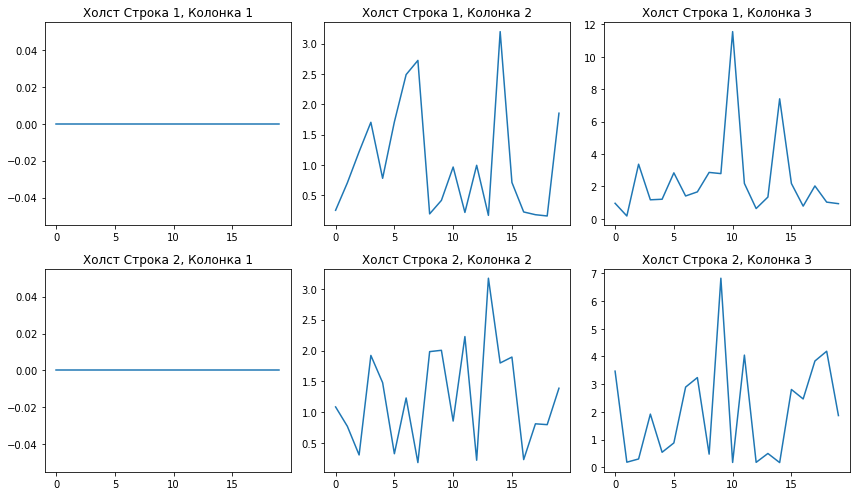

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
for row, row_axes in enumerate(axes):
    for column, ax in enumerate(row_axes):
        ax.plot(exponential(column, 20))
        ax.set_title(f'Холст Строка {row+1}, Колонка {column+1}')
fig.tight_layout()

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./datasets/titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


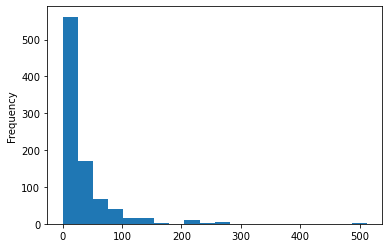

In [7]:
%matplotlib inline
df.Fare.plot.hist(bins=20)
plt.show()

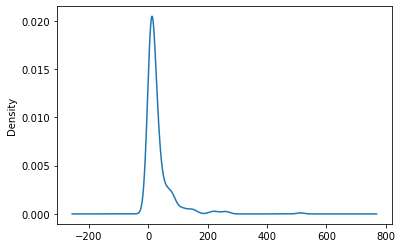

In [8]:
df.Fare.plot.kde()
plt.show()

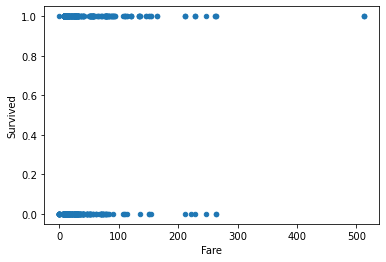

In [9]:
df.plot.scatter(x='Fare', y='Survived')
plt.show()

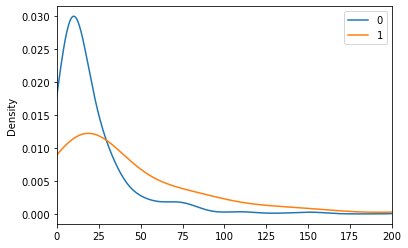

In [10]:
df.groupby('Survived').Fare.plot.kde()
plt.xlim(0, 200)
plt.legend()
plt.show()

### Объектный режим работы

Text(0.5, 1.0, 'Visualization')

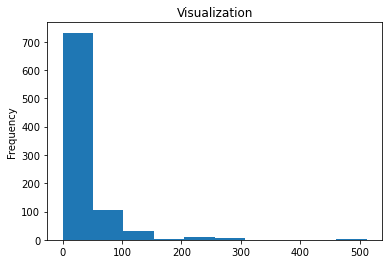

In [11]:
ax = df.Fare.plot.hist()
ax.set_title('Visualization')

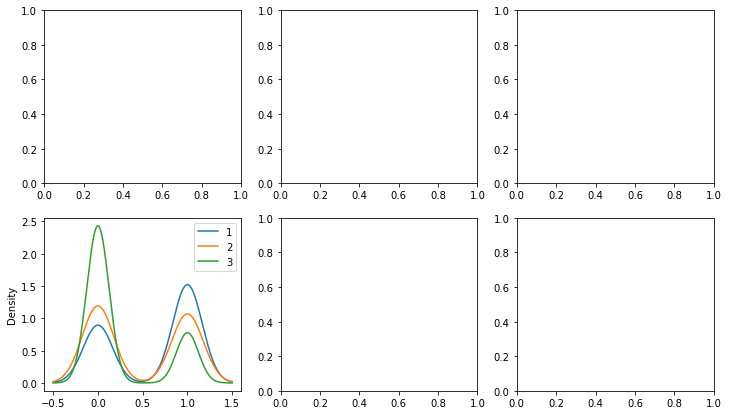

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
for label, class_df in df.groupby('Pclass'):
    class_df.Survived.plot.kde(ax=ax[1,0], label=label)
ax[1,0].legend()
plt.show()

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [ ]:
import plotly.offline as offline
from plotly.graph_objs import *

In [ ]:
offline.init_notebook_mode()

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/yankev/test/master/life-expectancy-per-GDP-2007.csv')
df.sort_values('gdp_percap', inplace=True)
df.head()

In [ ]:
trace = Scatter(x=df.gdp_percap, y=df.life_exp)
data = Data([trace])
offline.iplot(data)

In [ ]:
df['population'] = df.country.str.split(':').apply(lambda words: float(words[-1]))
df['name'] = df.country.str.split(':').apply(lambda words: words[1].split('<br>')[0])
americas = df[(df.continent == 'Americas')]
europe = df[(df.continent == 'Europe')]

In [ ]:
trace1 = Scatter(
                x=americas.gdp_percap, 
                y=americas.life_exp, 
                name='Americas', 
                mode='markers', 
                text=americas.name,
                marker={'size': americas.population/americas.population.max()*50})

trace2 = Scatter(
    x=europe.gdp_percap, 
    y=europe.life_exp, 
    name='Europe', 
    mode='markers',
    text=europe.name,
    marker={'size': europe.population/europe.population.max()*50})

data = Data([trace1, trace2])
offline.iplot(data)